In [170]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
  
# fetch dataset 
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) 
  
# data (as pandas dataframes) 
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features 
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets 
  

In [204]:
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables

,name,role,type,demographic,description,units,missing_values
0,Gender,Feature,Categorical,Gender,None,None,no
1,Age,Feature,Continuous,Age,None,None,no
2,Height,Feature,Continuous,None,None,None,no
3,Weight,Feature,Continuous,None,None,None,no
4,family_history_with_overweight,Feature,Binary,None,Has a family member suffered or suffers from o...,None,no
5,FAVC,Feature,Binary,None,Do you eat high caloric food frequently?,None,no
6,FCVC,Feature,Integer,None,Do you usually eat vegetables in your meals?,None,no
7,NCP,Feature,Continuous,None,How many main meals do you have daily?,None,no
8,CAEC,Feature,Categorical,None,Do you eat any food between meals?,None,no
9,SMOKE,Feature,Binary,None,Do you smoke?,None,no


In [225]:
merged  = X.join(y).copy()
merged.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [172]:
print('Gender',set(merged['Gender']))
print('family_history_with_overweight',set(merged['family_history_with_overweight']))
print('FAVC',set(merged['FAVC']))
print('CAEC',set(merged['CAEC']))
print('SMOKE',set(merged['SMOKE']))
print('SCC',set(merged['SCC']))
print('CALC',set(merged['CALC']))
print('MTRANS',set(merged['MTRANS']))
print('NObeyesdad',set(merged['NObeyesdad']))



Gender {'Male', 'Female'}
family_history_with_overweight {'yes', 'no'}
FAVC {'yes', 'no'}
CAEC {'Sometimes', 'Frequently', 'Always', 'no'}
SMOKE {'yes', 'no'}
SCC {'yes', 'no'}
CALC {'Sometimes', 'Frequently', 'Always', 'no'}
MTRANS {'Automobile', 'Bike', 'Walking', 'Public_Transportation', 'Motorbike'}
NObeyesdad {'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_II', 'Normal_Weight', 'Obesity_Type_I', 'Insufficient_Weight'}


In [211]:
# List of column names
a = [
    "Gender", "Age", "Height", "Weight", "family_history_with_overweight", "FAVC", 
    "FCVC", "NCP", "CAEC", "SMOKE", "CH2O", "SCC", "FAF", "TUE", "CALC", 
    "MTRANS", "NObeyesdad"
]

# Join X and y, and create a copy
tmpe = X.join(y).copy()

# Iterate through each column in the list
for i in a:
    # Get unique values of the column
    unique_values = set(tmpe[i])
    
    # Determine the type of the column
    if len(unique_values) == 2:
        print( "binary")
    elif pd.api.types.is_numeric_dtype(tmpe[i]):
        print( "continuous")
    else:
        print(unique_values)



binary
continuous
continuous
continuous
binary
binary
continuous
continuous
{'Sometimes', 'Frequently', 'Always', 'no'}
binary
continuous
binary
continuous
continuous
{'Sometimes', 'Frequently', 'Always', 'no'}
{'Automobile', 'Bike', 'Walking', 'Public_Transportation', 'Motorbike'}
{'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_II', 'Normal_Weight', 'Obesity_Type_I', 'Insufficient_Weight'}


In [173]:
binary_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
binary_mapping = {'Male': 1, 'Female': 0, 'yes': 1, 'no': 0}

for col in binary_columns:
    merged[col] = merged[col].map(binary_mapping)

In [174]:
ordinal_columns = ['CAEC', 'CALC']
ordinal_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}

for col in ordinal_columns:
    merged[col] = merged[col].map(ordinal_mapping)

In [175]:
nobeyesdad_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}




reverse_nobeyesdad_mapping = {0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Overweight_Level_I',
                              3: 'Overweight_Level_II', 4: 'Obesity_Type_I', 5: 'Obesity_Type_II', 
                              6: 'Obesity_Type_III'}



merged['NObeyesdad'] = merged['NObeyesdad'].map(nobeyesdad_mapping)



merged["is overweight plus"] =  np.where(merged['NObeyesdad'] > 1,True,False)

In [176]:
nominal_columns = ['MTRANS']
merge_encoded = pd.get_dummies(merged, columns=nominal_columns, drop_first=True)

In [177]:
merge_encoded = merge_encoded[['Gender', # for ordering 
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS_Bike',
 'MTRANS_Motorbike',
 'MTRANS_Public_Transportation',
 'MTRANS_Walking',
 'is overweight plus',
 'NObeyesdad']]

In [178]:

merge_encoded.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,is overweight plus,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,...,0,0.0,1.0,0,False,False,True,False,False,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,...,1,3.0,0.0,1,False,False,True,False,False,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,...,0,2.0,1.0,2,False,False,True,False,False,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,...,0,2.0,0.0,2,False,False,False,True,True,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,...,0,0.0,0.0,1,False,False,True,False,True,3


<Figure size 3000x3000 with 0 Axes>

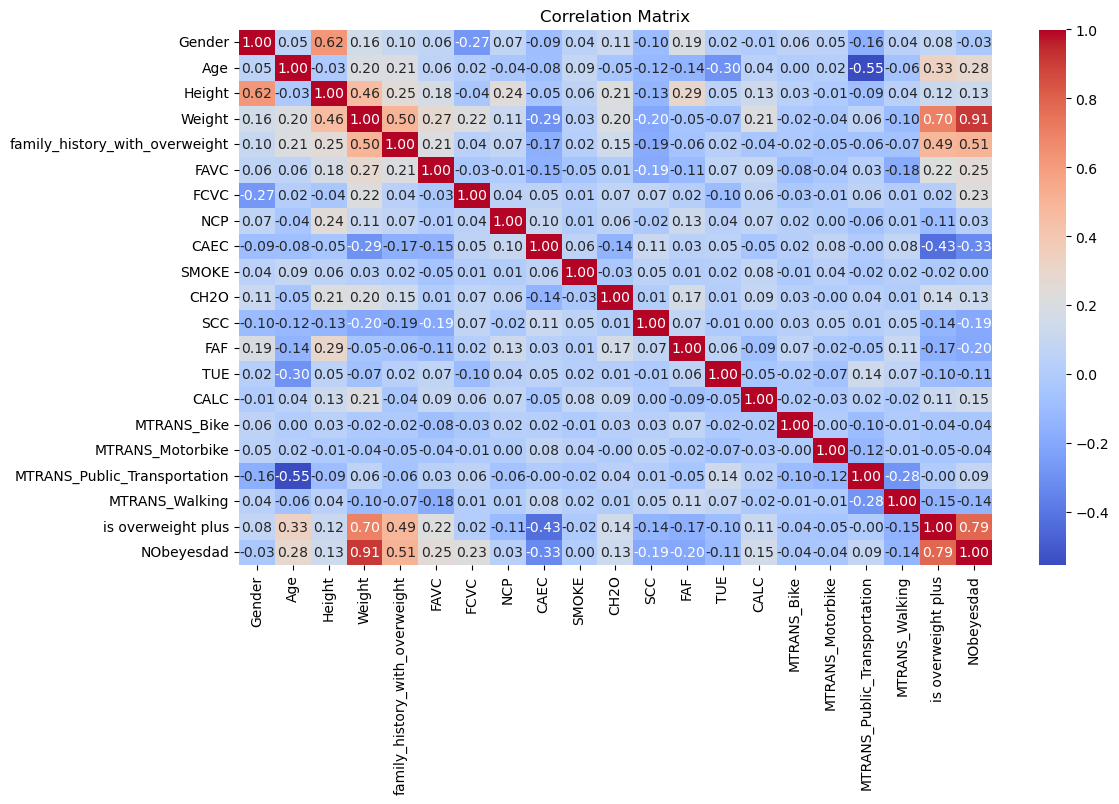

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt



corr_matrix = merge_encoded.corr()

plt.figure(figsize=(30, 30))

scorrelation_matrix = merge_encoded.corr()

# 2. Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(scorrelation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.tight_layout()
plt.title("Correlation Matrix")
plt.savefig('correlation_matrix.png')
plt.show()
plt.close()



In [201]:
merge_2  = X.join(y).copy()


binary_columns = ['Gender', 'family_history_with_overweight']
binary_mapping = {'Male': 1, 'Female': 0, 'yes': 1, 'no': 0}

for col in binary_columns:
    merge_2[col] = merge_2[col].map(binary_mapping)


a = merge_2.groupby('NObeyesdad').agg(
    Size  = ('NObeyesdad', 'size'),
    Age_mean = ('Age', 'mean'),
    weight_mean = ('Weight', 'mean'),
    height_mean = ('Height', 'mean'),
    overweight_history_percent= ('family_history_with_overweight', 'mean'),
    male_percentage = ('Gender','mean')

)


a['overweight_history_percent'] = a['overweight_history_percent'] * 100

a['male_percentage'] = a['male_percentage'] *100

a.round(2)




,Size,Age_mean,weight_mean,height_mean,overweight_history_percent,male_percentage
NObeyesdad,,,,,,
Insufficient_Weight,272,19.78,49.91,1.69,46.32,36.40
Normal_Weight,287,21.74,62.16,1.68,54.01,50.87
Obesity_Type_I,351,25.88,92.87,1.69,98.01,55.56
Obesity_Type_II,297,28.23,115.31,1.77,99.66,99.33
Obesity_Type_III,324,23.50,120.94,1.69,100.00,0.31
Overweight_Level_I,290,23.42,74.27,1.69,72.07,50.00
Overweight_Level_II,290,27.00,82.09,1.70,93.79,64.48


In [223]:
from sklearn.feature_selection import mutual_info_classif


# Assuming 'merge_encoded' is your encoded DataFrame
# Calculating mutual information scores
mi_scores = mutual_info_classif(
    merge_encoded.drop(['NObeyesdad','is overweight plus'], axis=1), 
    merge_encoded['is overweight plus'], 
    discrete_features=True
)

# Creating a series with scores, sorted in descending order
mi_series = pd.Series(mi_scores, index=merge_encoded.drop(['NObeyesdad','is overweight plus'], axis=1).columns).sort_values(ascending=False)

# Displaying the mutual information scores
print("Mutual Information Scores:\n", mi_series)


Mutual Information Scores:
 Weight                            0.493168
Height                            0.410622
Age                               0.379465
FAF                               0.307023
CH2O                              0.304269
TUE                               0.277300
FCVC                              0.195061
NCP                               0.178386
CAEC                              0.114238
family_history_with_overweight    0.106978
FAVC                              0.021208
MTRANS_Walking                    0.010205
CALC                              0.008838
SCC                               0.008211
Gender                            0.003302
MTRANS_Motorbike                  0.000921
MTRANS_Bike                       0.000693
SMOKE                             0.000150
MTRANS_Public_Transportation      0.000008
dtype: float64


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/ana

<Axes: >

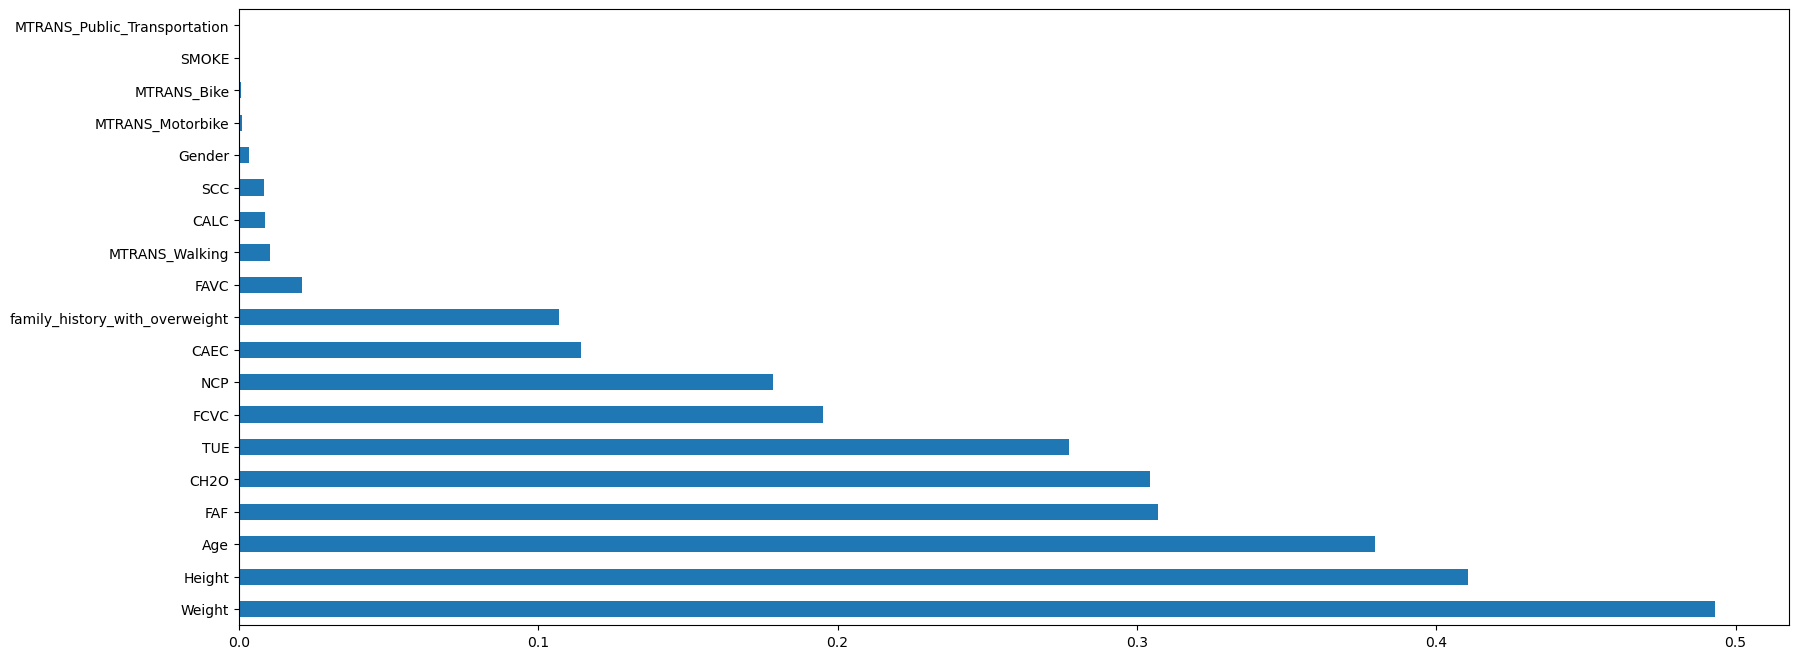

In [224]:
mi_series.plot.barh(figsize=(20, 8))

In [185]:
count_df = merged.groupby(['MTRANS', 'NObeyesdad']).size().unstack(fill_value=0)
count_df.rename(columns=reverse_nobeyesdad_mapping,inplace=True)
count_df

NObeyesdad,Insufficient_Weight,Normal_Weight,Overweight_Level_I,Overweight_Level_II,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III
MTRANS,,,,,,,
Automobile,46,45,66,94,110,95,1
Bike,0,4,2,0,0,1,0
Motorbike,0,6,1,1,3,0,0
Public_Transportation,220,200,212,189,236,200,323
Walking,6,32,9,6,2,1,0


In [188]:
X.shape

(2111, 16)